In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

In [2]:
def printMatrix(V):
    m = len(V)
    n = len(V[0])
    for i in range(m):
        for j in range(n):
            if(j>=2 and i!=0 and V[i][j]==0):
                print("",end="  ")
            else:
                print(f'{V[i][j]:10.04f}' ,  end="  ")
        print()
    print()

# Function for Newton's Divided Difference Method

In [3]:
def NDD(x,y,a):
    n = len(x)

    NDDTable = np.zeros((n,n+1))

    for i in range(n):
        NDDTable[i][0] = x[i]
        NDDTable[i][1] = y[i]

    # Calculating Table
    for i in range(2, n+1):
        for j in range(0,n - i+1):
            NDDTable[j][i] = ((NDDTable[j][i - 1] - NDDTable[j + 1][i - 1])/(NDDTable[j][0] - NDDTable[i + j-1][0]))
    
    Poly_deg = 0
    # Calculating interpolation Value
    ans = copy.copy(NDDTable[0][1])
    for i in range(2,n+1):
        p = 1
        for j in range(i-1):
            p *= (a-NDDTable[j][0])
        
        t = (p*NDDTable[0][i])
        if(t!=0):
            Poly_deg +=1
        ans += t
    
    print("Table of Newton's Divided Difference Method:\n")
    printMatrix(NDDTable)

    print(f"\nf({a}) = {ans:3.06f}")
    
    print(f"\nDegree of Polynomial = {Poly_deg}")
    
    return ans

# Input Section

In [4]:
x = np.array([ 3, 2, 1, -1 ]) 
y = np.array([3, 12, 15, -21])

a = 7

ans = NDD(x, y, a)

Table of Newton's Divided Difference Method:

    3.0000      3.0000     -9.0000     -3.0000      1.0000  
    2.0000     12.0000     -3.0000     -7.0000    
    1.0000     15.0000     18.0000      
   -1.0000    -21.0000        


f(7) = 27.000000

Degree of Polynomial = 3


In [5]:
x = np.array([ 3, 2, 1, -1, 0, 2.5 ]) 
y = np.array([3, 12, 15, -21, -10, 8])

a = 7

ans = NDD(x, y, a)

Table of Newton's Divided Difference Method:

    3.0000      3.0000     -9.0000     -3.0000      1.0000      2.6667     -1.1048  
    2.0000     12.0000     -3.0000     -7.0000     -7.0000      3.2190    
    1.0000     15.0000     18.0000      7.0000     -5.3905      
   -1.0000    -21.0000     11.0000     -1.0857        
    0.0000    -10.0000      7.2000          
    2.5000      8.0000            


f(7) = -4837.000000

Degree of Polynomial = 5


In [6]:
x = np.array([ 0, 1, 3, 5, 6, 9 ]) 
y = np.array([-18, 0, 0, -248, 0, 13104])

a = 5
ans = NDD(x, y, a)


Table of Newton's Divided Difference Method:

    0.0000    -18.0000     18.0000     -6.0000     -5.0000      6.0000      1.0000  
    1.0000      0.0000      -31.0000     31.0000     15.0000    
    3.0000      0.0000   -124.0000    124.0000    151.0000      
    5.0000   -248.0000    248.0000   1030.0000        
    6.0000      0.0000   4368.0000          
    9.0000  13104.0000            


f(5) = -248.000000

Degree of Polynomial = 3


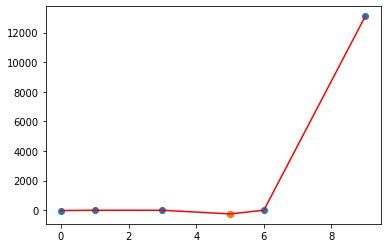

In [7]:
plt.scatter(x,y)
plt.plot(x,y,'r')
plt.scatter(a,ans)
plt.show()